In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['lines.linewidth'] = 5

# Energy Wells

In [5]:
N_POINTS = 1000
X = np.linspace(-5,5,1000)

def gaussian(X, mu, sigma):
    return 1/(sigma* np.sqrt(2*np.pi)) * np.exp(-0.5 * ((X-mu)/sigma)**2)

def f(sigma):
    y = gaussian(X, -2, sigma) + gaussian(X, +2, sigma)
    y *= -1
    return (y - np.min(y)) / (np.max(y) - np.min(y))

def newPlot():
    plt.figure()
    plt.axis("off")
    plt.xticks([],[])
    plt.yticks([],[])
    plt.xlim(-5,5)

newPlot()
plt.plot(X, -gaussian(X, 0, 1.5))
plt.tight_layout()
plt.savefig("images/introduction_energywell01.png")
plt.close();

newPlot()
plt.plot(X, f(1.5))
plt.tight_layout()
plt.savefig("images/introduction_energywell02.png")
plt.close();

newPlot()
plt.plot(X, f(1.5))
plt.plot(X, f(0.5))
plt.tight_layout()
plt.savefig("images/introduction_energywell03.png")
plt.close();


# Gridsearch Data

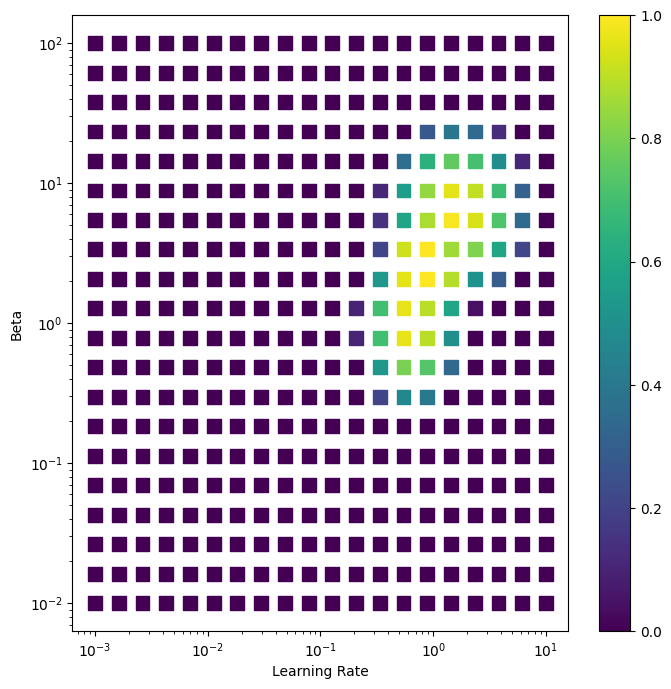

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

X = np.logspace(-3, 1, base=10, num=20)
Y = np.logspace(-2, 2, base=10, num=20)
X, Y = np.meshgrid(X,Y)

A = np.linspace(0,1,num=20)
B = np.linspace(0,1,num=20)
A, B = np.meshgrid(A,B)

r = 30
def f(x,y):
    z = 0
    z += 1-np.clip(r*(x-0.8)**2 + r*(y-0.7)**2, 0, 1)
    z += 1-np.clip(2*r*(x-0.6)**2 + r*(y-0.5)**2, 0, 1)
    return np.clip(z, 0, 1)
Z = f(A,B)

X, Y, Z = X.flatten(), Y.flatten(), Z.flatten()

cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(0, np.max(Z))
# norm = mpl.colors.Normalize(0, 1.0)
colorMappable = mpl.cm.ScalarMappable(norm, cmap)
Z = colorMappable.to_rgba(Z)

plt.figure(figsize=(8,8))
plt.scatter(X, Y, c=Z, marker="s", s=100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Beta")
plt.colorbar(mappable=colorMappable, ax=plt.gca())
plt.title(f"")
plt.show();